# Local AutoML training

### Ressources
- https://github.com/automl/auto-sklearn/issues/1684
- https://geemap.org/notebooks/46_local_rf_training/

## Install auto-sklearn

In [1]:
# 1. uninstall all affected packages
!pip uninstall -y Cython scipy pyparsing scikit_learn imbalanced-learn mlxtend yellowbrick

Found existing installation: Cython 3.0.6
Uninstalling Cython-3.0.6:
  Successfully uninstalled Cython-3.0.6
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: pyparsing 3.1.1
Uninstalling pyparsing-3.1.1:
  Successfully uninstalled pyparsing-3.1.1
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Found existing installation: mlxtend 0.22.0
Uninstalling mlxtend-0.22.0:
  Successfully uninstalled mlxtend-0.22.0
Found existing installation: yellowbrick 1.5
Uninstalling yellowbrick-1.5:
  Successfully uninstalled yellowbrick-1.5


In [2]:
# 2. install packages to be downgraded
!pip install Cython==0.29.36 scipy==1.9 pyparsing==2.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires scikit-learn, which is not installed.
librosa 0.10.1 requires scikit-learn>=0.20.0, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not installed.
httplib2 0.22.0 requires pyparsing!=3.0.0,!=3.0.1,!=3.0.2,!=3.0.3,<4,>=2.4.2; python_version > "3.0", but you have pyparsing 2.4.0 which is incompatible.


In [1]:
# 3. install older scikit-learn disregarding its dependencies
!pip install scikit-learn==0.24.2 --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=22231922 sha256=9ea98f68e406ff951be8a7fc8e26e89c6ffdd13c7412fc3cbc9f7dd4a74b1c51
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.17.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.2 which is incompatible.


In [2]:
# 4. finally install auto-sklearn
!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 16.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.9 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641936 sha256=1e17b196adda4b7925e7929090b4577d42d22d063b6b4cb5634037a8887c7733
  Stored in directory: /root/.cache/pip/wheels/4d/0a/f9/8c1a06bcc36bc16b467b044b5bb03a90f92a5c5e6cd443414b
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl

In [1]:
# 5. then, try loading the package repeatedly until trash in its dependencies are clean
#import autosklearn

## Setup

In [2]:
from google.colab import drive
import pandas as pd
import autosklearn.classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/land_cover_classification_kaza/automl

/content/drive/MyDrive/land_cover_classification_kaza/automl


## Load train and test set

In [5]:
train = pd.read_csv('train.csv')
train

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,class,LC2023
0,550.333333,603.500000,543.777778,478.333333,278.666667,283.000000,221.500000,218.307692,210.333333,177.142857,6,Water
1,761.728571,969.202381,1498.000000,1952.222222,2275.200000,2539.833333,2663.555556,2903.750000,3354.500000,2217.666667,3,Forest
2,686.571429,861.375000,1446.666667,1899.500000,2319.500000,2613.333333,2893.600000,2994.000000,2897.333333,1894.500000,5,Shrub
3,636.750000,802.666667,1104.800000,1396.250000,1764.500000,2053.300000,2140.200000,2365.333333,2637.000000,1938.500000,2,Crop
4,664.000000,796.375000,1057.000000,1485.000000,1940.142857,2274.666667,2472.000000,2657.428571,2638.500000,1746.000000,3,Forest
...,...,...,...,...,...,...,...,...,...,...,...,...
879,661.500000,858.166667,969.666667,1338.000000,2023.500000,2213.000000,2264.000000,2474.000000,2632.750000,1977.500000,2,Crop
880,543.100000,551.000000,480.222222,400.555556,288.846154,290.066667,294.250000,282.250000,150.727273,110.857143,6,Water
881,623.000000,803.666667,1112.000000,1648.250000,2064.333333,2273.666667,2465.500000,2719.666667,3167.000000,1991.000000,5,Shrub
882,591.833333,787.166667,1300.666667,1807.571429,2147.750000,2498.375000,2636.500000,3046.200000,3105.500000,2122.000000,3,Forest


In [6]:
X_train = train.drop(['class', 'LC2023'], axis=1)
X_train

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12
0,550.333333,603.500000,543.777778,478.333333,278.666667,283.000000,221.500000,218.307692,210.333333,177.142857
1,761.728571,969.202381,1498.000000,1952.222222,2275.200000,2539.833333,2663.555556,2903.750000,3354.500000,2217.666667
2,686.571429,861.375000,1446.666667,1899.500000,2319.500000,2613.333333,2893.600000,2994.000000,2897.333333,1894.500000
3,636.750000,802.666667,1104.800000,1396.250000,1764.500000,2053.300000,2140.200000,2365.333333,2637.000000,1938.500000
4,664.000000,796.375000,1057.000000,1485.000000,1940.142857,2274.666667,2472.000000,2657.428571,2638.500000,1746.000000
...,...,...,...,...,...,...,...,...,...,...
879,661.500000,858.166667,969.666667,1338.000000,2023.500000,2213.000000,2264.000000,2474.000000,2632.750000,1977.500000
880,543.100000,551.000000,480.222222,400.555556,288.846154,290.066667,294.250000,282.250000,150.727273,110.857143
881,623.000000,803.666667,1112.000000,1648.250000,2064.333333,2273.666667,2465.500000,2719.666667,3167.000000,1991.000000
882,591.833333,787.166667,1300.666667,1807.571429,2147.750000,2498.375000,2636.500000,3046.200000,3105.500000,2122.000000


In [7]:
y_train = train['class']
y_train

0      6
1      3
2      5
3      2
4      3
      ..
879    2
880    6
881    5
882    3
883    3
Name: class, Length: 884, dtype: int64

In [8]:
test = pd.read_csv('test.csv')
test

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,class,LC2023
0,666.571429,862.400000,1200.400000,1496.200000,1816.000000,2071.750000,2276.250000,2499.875000,2972.500000,2059.25,3,Forest
1,666.285714,841.000000,1120.800000,1576.333333,2086.500000,2424.500000,2607.000000,2770.666667,3045.500000,1971.00,5,Shrub
2,670.888889,928.600000,1438.000000,1837.750000,2140.500000,2412.857143,2576.750000,2857.500000,3065.000000,2187.50,7,Wetlands
3,1061.428571,1372.200000,1891.714286,2184.375000,2435.000000,2624.000000,2871.375000,2978.500000,4128.333333,3130.00,2,Crop
4,1180.750000,1704.666667,2536.000000,2854.600000,3177.333333,3459.500000,3719.000000,3864.500000,4646.000000,3445.00,0,Bare
...,...,...,...,...,...,...,...,...,...,...,...,...
374,611.000000,842.000000,1128.000000,1422.125000,1962.166667,2207.000000,2335.000000,2558.083333,2698.666667,2215.50,7,Wetlands
375,1561.733333,1830.400000,2213.214286,2686.550000,2806.925000,2906.000000,2595.444444,3103.500000,4402.714286,4194.00,1,BuiltUp
376,974.904762,1326.777778,1890.933333,2079.600000,2272.375000,2462.818182,2603.764706,2719.615385,3952.000000,3292.65,1,BuiltUp
377,594.162791,803.700000,1273.809524,1526.625000,1827.533333,2076.500000,2265.157895,2410.000000,3054.625000,2175.75,5,Shrub


In [9]:
X_test = test.drop(['class', 'LC2023'], axis=1)
X_test

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12
0,666.571429,862.400000,1200.400000,1496.200000,1816.000000,2071.750000,2276.250000,2499.875000,2972.500000,2059.25
1,666.285714,841.000000,1120.800000,1576.333333,2086.500000,2424.500000,2607.000000,2770.666667,3045.500000,1971.00
2,670.888889,928.600000,1438.000000,1837.750000,2140.500000,2412.857143,2576.750000,2857.500000,3065.000000,2187.50
3,1061.428571,1372.200000,1891.714286,2184.375000,2435.000000,2624.000000,2871.375000,2978.500000,4128.333333,3130.00
4,1180.750000,1704.666667,2536.000000,2854.600000,3177.333333,3459.500000,3719.000000,3864.500000,4646.000000,3445.00
...,...,...,...,...,...,...,...,...,...,...
374,611.000000,842.000000,1128.000000,1422.125000,1962.166667,2207.000000,2335.000000,2558.083333,2698.666667,2215.50
375,1561.733333,1830.400000,2213.214286,2686.550000,2806.925000,2906.000000,2595.444444,3103.500000,4402.714286,4194.00
376,974.904762,1326.777778,1890.933333,2079.600000,2272.375000,2462.818182,2603.764706,2719.615385,3952.000000,3292.65
377,594.162791,803.700000,1273.809524,1526.625000,1827.533333,2076.500000,2265.157895,2410.000000,3054.625000,2175.75


In [10]:
y_test = test['class']
y_test

0      3
1      5
2      7
3      2
4      0
      ..
374    7
375    1
376    1
377    5
378    1
Name: class, Length: 379, dtype: int64

## Use auto-sklearn to find the best model/ensemble

### Open questions
- What's in the data preprocessor?
- What's in the feature preprocessor?
- How can we extract the most useful things and translate them to something that works with EE?

In [11]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60*60,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 10},
    metric=autosklearn.metrics.f1_macro,
    n_jobs=-1
)

In [12]:
automl.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      metric=f1_macro, n_jobs=-1, per_run_time_limit=720,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 10})

In [13]:
y_train_pred = automl.predict(X_train)
y_test_pred = automl.predict(X_test)

## Evaluation

### Train set classification metrics

In [14]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_train, y_train_pred)))

Accuracy: 0.7477


In [15]:
print('Precision: {:0.4f}'.format(precision_score(y_train, y_train_pred, average='macro')))

Precision: 0.7618


In [16]:
print('Recall: {:0.4f}'.format(recall_score(y_train, y_train_pred, average='macro')))

Recall: 0.7512


In [17]:
print('F1-Score: {:0.4f}'.format(f1_score(y_train, y_train_pred, average='macro')))

F1-Score: 0.7537


In [18]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67        45
           1       0.85      0.89      0.87        65
           2       0.83      0.84      0.83       158
           3       0.71      0.78      0.74       228
           4       0.57      0.71      0.63        58
           5       0.69      0.61      0.65       208
           6       1.00      0.82      0.90        74
           7       0.74      0.71      0.72        48

    accuracy                           0.75       884
   macro avg       0.76      0.75      0.75       884
weighted avg       0.75      0.75      0.75       884



In [19]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[ 29,   1,  10,   0,   1,   3,   0,   1],
       [  3,  58,   3,   0,   0,   1,   0,   0],
       [  7,   4, 133,   1,   3,   5,   0,   5],
       [  0,   0,   1, 178,   9,  39,   0,   1],
       [  0,   0,   0,   9,  41,   5,   0,   3],
       [  0,   1,  10,  54,  15, 127,   0,   1],
       [  2,   4,   4,   0,   1,   1,  61,   1],
       [  0,   0,   0,   9,   2,   3,   0,  34]])

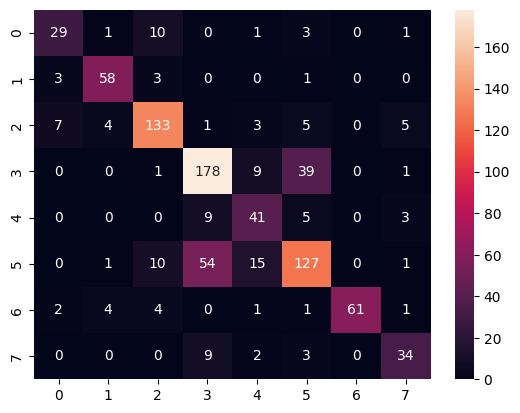

In [20]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Test set classifiction metrics

In [21]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy: 0.6412


In [22]:
print('Precision: {:0.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))

Precision: 0.6328


In [23]:
print('Recall: {:0.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))

Recall: 0.6266


In [24]:
print('F1-Score: {:0.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))

F1-Score: 0.6189


In [25]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40        14
           1       0.88      0.88      0.88        40
           2       0.67      0.82      0.74        65
           3       0.60      0.70      0.64        89
           4       0.29      0.42      0.34        19
           5       0.61      0.41      0.49        96
           6       1.00      0.77      0.87        39
           7       0.69      0.53      0.60        17

    accuracy                           0.64       379
   macro avg       0.63      0.63      0.62       379
weighted avg       0.66      0.64      0.64       379



In [26]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 7,  1,  4,  0,  0,  2,  0,  0],
       [ 2, 35,  3,  0,  0,  0,  0,  0],
       [ 9,  2, 53,  0,  0,  1,  0,  0],
       [ 0,  0,  1, 62,  8, 16,  0,  2],
       [ 0,  0,  1,  3,  8,  6,  0,  1],
       [ 0,  0, 11, 35, 11, 39,  0,  0],
       [ 3,  2,  3,  0,  0,  0, 30,  1],
       [ 0,  0,  3,  4,  1,  0,  0,  9]])

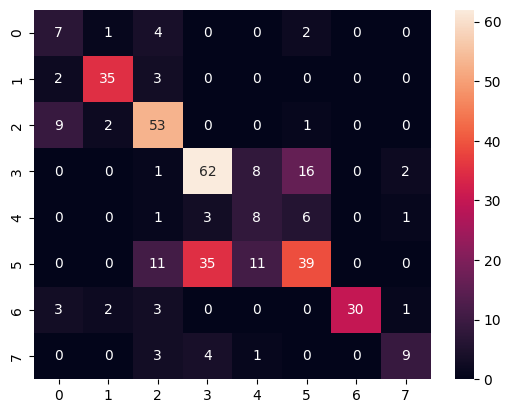

In [27]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### AutoML evaluation

In [28]:
automl.leaderboard(ensemble_only=False)

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
37,1,0.08,lda,0.367057,16.125837
56,2,0.00,lda,0.373047,23.333548
73,3,0.00,lda,0.373771,52.872970
18,4,0.02,lda,0.378322,105.606206
47,5,0.04,lda,0.381067,29.942618
...,...,...,...,...,...
65,65,0.00,lda,0.894379,62.375175
60,66,0.00,passive_aggressive,0.908133,17.622592
7,67,0.00,sgd,0.948745,129.123121


In [29]:
automl.leaderboard(ensemble_only=True)

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
37,1,0.08,lda,0.367057,16.125837
18,2,0.02,lda,0.378322,105.606206
47,3,0.04,lda,0.381067,29.942618
32,4,0.02,random_forest,0.426426,54.076046
45,5,0.16,adaboost,0.494457,60.662061
64,6,0.02,lda,0.563412,11.434712
36,7,0.66,adaboost,0.587331,29.392351


In [30]:
automl.get_models_with_weights()

[(0.66,
  SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'select_rates_classification', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adaboost:learning_rate': 1.415386293987176, 'classifier:adaboost:max_depth': 9, 'classifier:adaboost:n_estimators': 228, 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:select_rates_classification:alpha': 0.02630690799331837, 'feature_preprocessor:select_rates_classification:score_func': 'chi2', 'data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max': 0.844983063115948, 'data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min': 0.19600763547852626, 'feature_preprocessor:select_rates_classification:mode': 'fwe'

In [31]:
automl.show_models()

{18: {'model_id': 18,
  'rank': 1,
  'cost': 0.3783219344459688,
  'ensemble_weight': 0.02,
  'voting_model': VotingClassifier(estimators=None, voting='soft'),
  'estimators': [{'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7dc77ee2fdc0>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7dc77922df00>,
    'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7dc77922e9b0>,
    'sklearn_classifier': LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',
                               tol=0.018821286956948503)},
   {'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7dc77ab49210>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7dc77d3